## probability distributions and the decay process

the probability for a decay is extremely low, but this decay process is observed due to the massive number of nuclei in a sample.
best probability distribution that explains this phenomenon is poison distribution for small times. for larger times a Gaussian distribution best describes this event.

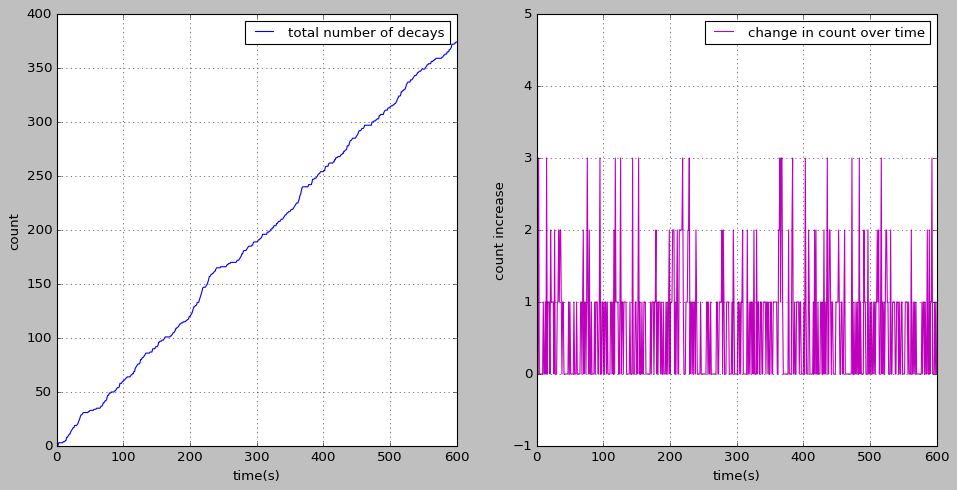

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp

t_max = 600
dt = 1

poisson_dist = lambda m,n : m^n/factorial(n) * exp(-m)


t = np.arange(0,t_max+1,dt)
data = np.genfromtxt('experiment_2_data.csv',dtype=int)

plt.subplot(1,2,1)
plt.style.use('classic')
plt.grid(True)
plt.plot(t,data,label="total number of decays")       
plt.legend(fontsize=12)
plt.xlabel('time(s)')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.style.use('classic')
plt.grid(True)
plt.plot(t[1:],data[1:]-data[:-1],label="change in count over time",color="C4")       
plt.legend(fontsize=12)
plt.xlabel('time(s)')
plt.ylim(-1,5)
plt.ylabel('count increase')

plt.subplots_adjust(bottom=0.1, right=1.5, top=1)
plt.savefig("experiment_2_fig1.svg",bbox_inches='tight')

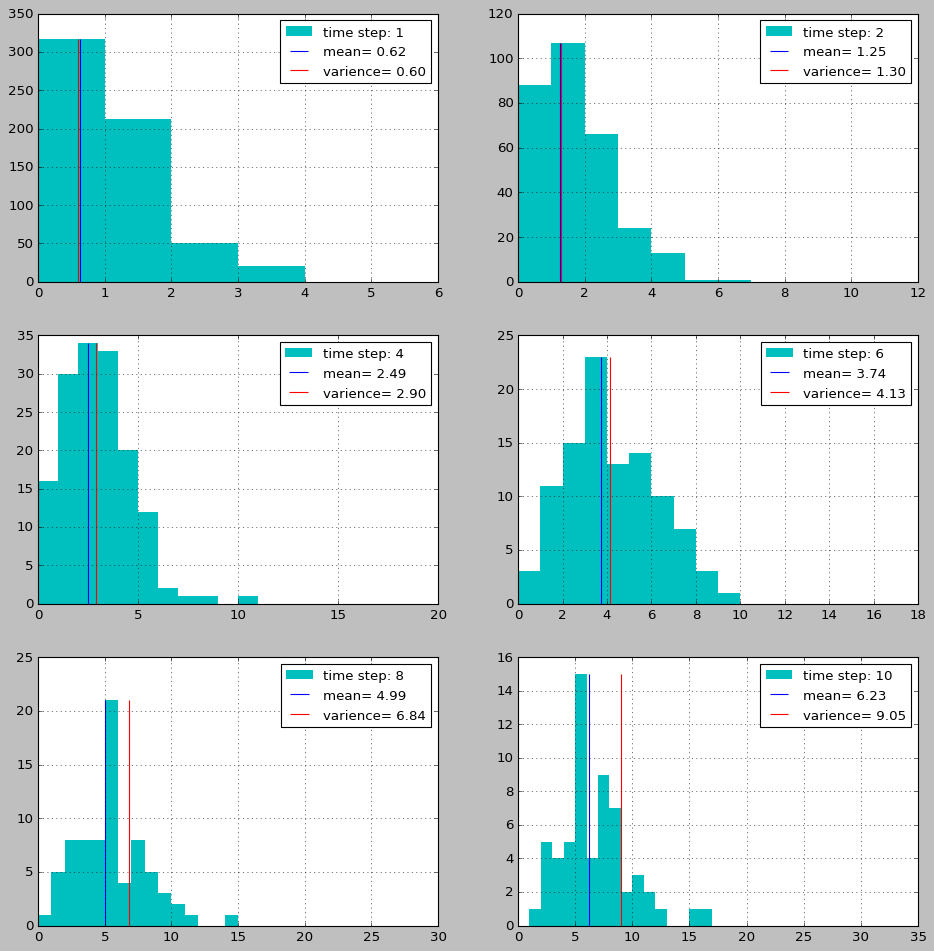

In [177]:
def hist(data, spacing:int):
    n = data[spacing::spacing]-data[:-spacing:spacing]
    return np.histogram(n,2*np.max(n),(0,2*np.max(n))), np.mean(n), np.var(n)


def plot(ydim,xdim,times):
    for i, t in enumerate(times):
        hs, mean ,var = hist(data,t)
        plt.subplot(ydim,xdim,i+1)
        plt.style.use('classic')
        plt.grid(True)
        plt.stairs(*hs,fill=True,color='C3',label=f"time step: {t}")
        plt.vlines(mean,0,hs[0].max(),label=f"mean= {mean:.2f}")
        plt.vlines(var,0,hs[0].max(),label=f"varience= {var:.2f}",color="C9")
        plt.legend(fontsize=12)
    plt.subplots_adjust(bottom=0.1, right=1.5, top=2)
    plt.savefig("experiment_2_fig2.svg", bbox_inches='tight')

plot(3,2,(1,2,4,6,8,10))